<h1 style="text-align:center;margin:50px 0">Random Forests</h1>

## 1. Simple Random Forest model

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
cancer_data = load_breast_cancer()

In [3]:
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

In [4]:
X = df[cancer_data.feature_names].values
y = df['target'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

In [6]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
first_row = X_test[0]
print("Prediction:", rf.predict([first_row])[0])
print("True value:", y_test[0])

Prediction: 1
True value: 1


In [12]:
print("Score:", rf.score(X_test, y_test))

Score: 0.972027972027972


## 2. Tuning a Random Forest

<div style="background-color:#9AECDB;padding:5px 10px;margin:0">
    <p> Random Forest Parameters </p>
    <ul>
        <li><b>n_estimators</b> (the number of trees) </li>
        <li><b>max_features</b> (the number of features to consider at each split) </li>
    </ul>
</div>

### a) Grid Search

In [13]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [14]:
cancer_data = load_breast_cancer()

In [15]:
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

In [16]:
X = df[cancer_data.feature_names].values
y = df['target'].values

In [ ]:
param_grid = {
    'n_estimators': [10, 25, 50, 75, 100],
}

In [18]:
rf = RandomForestClassifier(random_state=123)

In [19]:
gs = GridSearchCV(rf, param_grid, scoring='f1', cv=5)
gs.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'n_estimators': [10, 25, 50, 75, 100]}, scoring='f1')

In [20]:
print("best params:", gs.best_params_)

best params: {'n_estimators': 25}


In [23]:
res = gs.predict([X[0]])[0]
print("Malignant") if res == 0 else print("Benign")

Malignant


### b) Elbow Graph

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [29]:
cancer_data = load_breast_cancer()

In [30]:
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

In [31]:
X = df[cancer_data.feature_names].values
y = df['target'].values

In [32]:
n_estimators = list(range(1, 101))
param_grid = {
    'n_estimators': n_estimators,
}

In [33]:
rf = RandomForestClassifier()

In [34]:
gs = GridSearchCV(rf, param_grid, cv=5)
gs.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [50]:
scores = gs.cv_results_['mean_test_score']

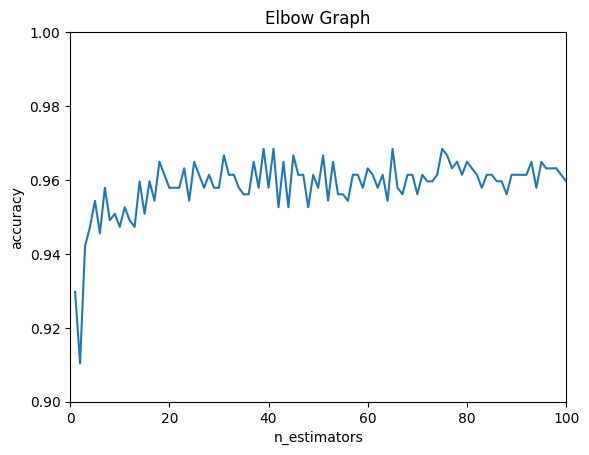

In [55]:
plt.plot(n_estimators, scores)
plt.title("Elbow Graph")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.xlim(0, 100)
plt.ylim(0.9, 1)
plt.show()

In [56]:
print("The best value of n_estimators parameter based on accuracy:", np.where(scores == max(scores))[0][0]+1)

The best value of n_estimators parameter based on accuracy: 41


<p style="color:blue"> If we look at this graph, we see that around 10 trees the graph levels out. The best model occurred at n_estimators=41, but given how volatile it is, that was probably due to random chance. We should choose about 10 to be our number of estimators, because we want the minimum number of estimators that still yield maximum performance. </p>

## 3. Feature Importances

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
cancer_data = load_breast_cancer()

In [ ]:
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

In [96]:
X = df[cancer_data.feature_names].values
y = df['target'].values

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

In [98]:
rf = RandomForestClassifier(n_estimators=10, random_state=111)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=111)

In [99]:
print(rf.score(X_test, y_test))

0.965034965034965


<p style="color:blue"> In our dataset, we happen to notice that features with <b>"worst"</b> seem to have higher importances. As a result we are going to build a new model with the selected features and see if it improves accuracy. </p>

In [100]:
X_worst = df[[c for c in df.columns if "worst" in c]]

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_worst, y, random_state=101)

In [102]:
rf = RandomForestClassifier(n_estimators=10, random_state=111)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=111)

In [103]:
print(rf.score(X_test, y_test))

0.972027972027972


## 4. Comparing RF with LR using K-fold Cross Validation

<p style="color:red">By using <b title="Make a large circle containing a smaller circle in 2d. A simple toy dataset to visualize clustering and classification algorithms.">make_circles</b> dataset.</p>

In [104]:
from sklearn.datasets import make_circles
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [105]:
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

In [106]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)

In [107]:
lr_scores = []
rf_scores = []

In [108]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lr = LogisticRegression(solver='lbfgs')
    lr.fit(X_train, y_train)
    lr_scores.append(lr.score(X_test, y_test))
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train, y_train)
    rf_scores.append(rf.score(X_test, y_test))

In [109]:
print("LR accuracy:", np.mean(lr_scores))
print("RF accuracy:", np.mean(rf_scores))

LR accuracy: 0.36
RF accuracy: 0.8400000000000001
